In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.4f}'.format
%matplotlib inline

# Sample Analysis

In [2]:
df = pd.read_csv('safety/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')

In [29]:
df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [3]:
df_labels = pd.read_csv('safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv')

In [87]:
df_labels.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


In [4]:
# Speed m/s to km/h
df['Speed_kmh'] = df['Speed'].apply(lambda x : x * 3.6)

In [5]:
df = pd.merge(df,df_labels, on='bookingID')

In [6]:
# Converts 'seconds' to time delta
df['seconds_delta'] = pd.to_timedelta(df['second'],unit='s') 

In [7]:
df_safe = df[df['label']==0]
df_dangerous = df[df['label']==1]

In [92]:
df.shape

(1615468, 14)

In [5]:
len(df['bookingID'].unique())

20000

#### Simple descriptive statistics check

In [93]:
df_safe.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,Speed_kmh,label,seconds_delta
count,1121246.0000,1121246.0000,1121246.0000,1121246.0000,1121246.0000,1121246.0000,1121246.0000,1121246.0000,1121246.0000,1121246.0000,1121246.0000,1121246.0000,1121246.0000,1121246
mean,804662490338.7854,11.0498,169.5634,0.0667,4.5269,0.8679,-0.0020,0.0011,-0.0003,6612.5488,9.1848,33.0653,0.0000,0 days 01:50:12.548816
std,492867108406.4407,85.9071,106.7335,1.3177,8.1903,3.0616,0.1152,0.2463,0.1111,1939794.5491,8.0720,29.0590,0.0000,22 days 10:49:54.549143
min,0.0000,0.9000,0.0000,-33.4408,-24.5182,-78.4484,-20.6908,-31.9562,-17.8287,0.0000,-1.7198,-6.1912,0.0000,0 days 00:00:00
25%,377957122085.0000,3.9000,79.0000,-0.4996,-2.1312,-0.9062,-0.0268,-0.0294,-0.0183,217.0000,1.2650,4.5539,0.0000,0 days 00:03:37
50%,773094113292.0000,4.0740,169.0000,0.0601,9.1171,0.7585,-0.0008,0.0003,-0.0000,470.0000,7.9036,28.4530,0.0000,0 days 00:07:50
75%,1211180777599.0000,8.0000,262.0000,0.6227,9.7187,2.6720,0.0230,0.0310,0.0181,780.0000,15.6506,56.3420,0.0000,0 days 00:13:00
max,1700807049407.0000,6063.0000,359.9985,22.0552,61.1594,44.3321,9.9009,62.5420,33.8318,619316528.0000,44.9694,161.8900,0.0000,7168 days 00:22:08


In [57]:
df_dangerous.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,Speed_kmh,label
count,494222.0000,494222.0000,494222.0000,494222.0000,494222.0000,494222.0000,494222.0000,494222.0000,494222.0000,494222.0000,494222.0000,494222.0000,494222.0000
mean,850315456592.3423,12.7495,167.4611,0.0716,4.3257,0.9629,-0.0011,-0.0011,-0.0002,750.7652,8.6126,31.0053,1.0000
std,499077294340.9393,88.1618,108.4454,1.6445,7.9940,3.6435,0.1918,0.5033,0.2191,564.8554,8.1703,29.4130,0.0000
min,1.0000,0.7500,0.0000,-32.7680,-57.3036,-59.9576,-26.4480,-57.3449,-53.5545,0.0000,-1.0000,-3.6000,1.0000
25%,412316860576.0000,3.9000,75.0000,-0.5296,-2.0148,-0.9833,-0.0269,-0.0310,-0.0194,326.0000,0.5300,1.9080,1.0000
50%,858993459286.0000,4.4590,166.8275,0.0638,8.9889,0.8332,-0.0005,0.0002,0.0000,663.0000,6.6969,24.1090,1.0000
75%,1279900254353.0000,8.0000,263.0000,0.6644,9.6880,2.9521,0.0243,0.0321,0.0186,1064.0000,15.0600,54.2160,1.0000
max,1709396983975.0000,3238.8470,359.9963,29.6165,72.8100,73.3142,10.6881,29.6003,25.5354,8232.0000,50.5500,181.9800,1.0000


On the table above, we can see some peculiarities:
- The max value of 'Accuracy' is 6063 - That's 6km of GPS accuracy inferred that's a large area
- The max value of seconds is around 619 million. That has to be a sensor peculiarity
- There is a negative Speed in m/s / km/h

We may need to keep that in mind that these columns may exhibit these outliers

### Speed Analysis

Traditional belief says that 'dangerous' drivers tend to drive faster. Let's see if the distribution tells something

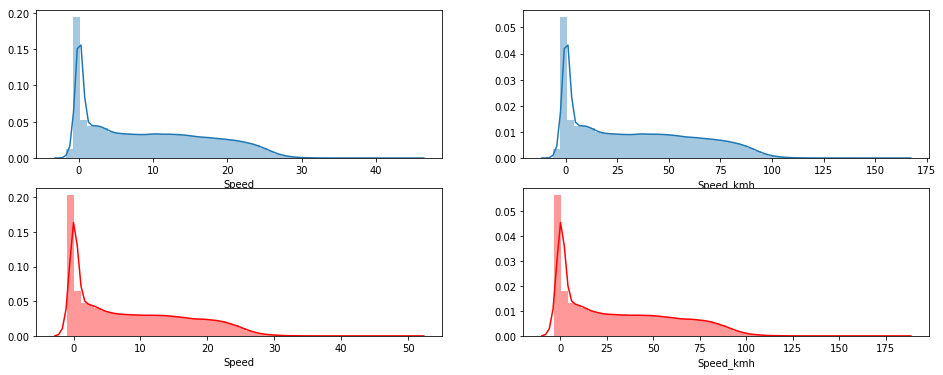

In [8]:
# f, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2,figsize=(16,6))
fig, axes = plt.subplots(2, 2, figsize=(16,6),subplot_kw=dict())
sns.distplot(df_safe['Speed'], ax=axes[0,0])
sns.distplot(df_safe['Speed_kmh'], ax=axes[0,1])

sns.distplot(df_dangerous['Speed'], ax=axes[1,0], color='red')
sns.distplot(df_dangerous['Speed_kmh'], ax=axes[1,1], color='red')

The distribution does not tell much as they exhibit the same left skewed distribution. 
This makes sense as passenger's discomfort (which creates the labelling of 'dangerous driving') may not be exhibited by the measure of speed alone, but rather changes in speed such as sudden acceleration and breaking.

### Measurements of Changes in Speed - Accelerometer

Looking at the data given, the mostly vebrose and rich data would be the tri-axis accelerometer and gyroscope.

Experiment: Let's use purely accelerometer data to predict dangerous driving

TO-DO: Give details on the accelerometer here

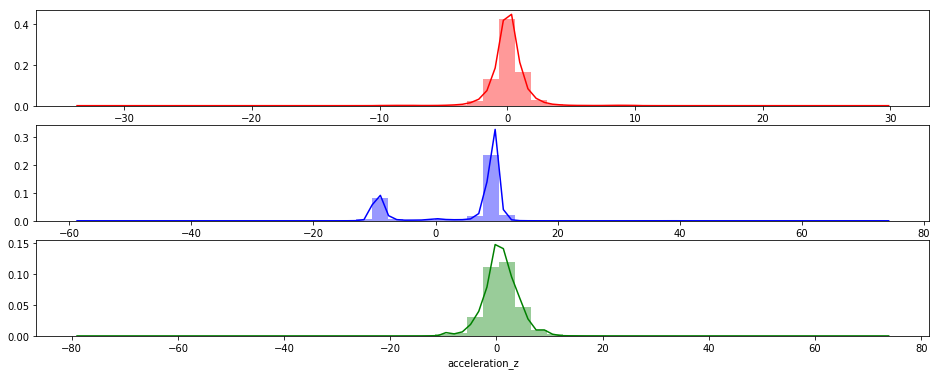

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(16,6))
sns.distplot(df['acceleration_x'], ax=ax1, color='red')
sns.distplot(df['acceleration_y'], ax=ax2, color='blue')
sns.distplot(df['acceleration_z'], ax=ax3, color='green')

From the chart above, we can see that the x and z-axis tend to center around 0, while the y-axis tend to center around 10. This is due to the fact that most drivers orient their phones at an upright position on their mount, causing the accelerometer to detect acceleration due to gravity acting upon the y-axis of the phone

We gotta remove the effects of gravity from our accelerometer. But from the distribution plot, we can see that most orientations at set upright, so the accelerometer registers acceleration due to gravity on the y-axis

A non-trivial approach to account for gravity is to compute the 3x3 rotational matrix (yaw, pitch, roll) from gyroscope data and multiply it with the 3x1 acceleration vector, then subtract g from the axis where g is acting upon (which is y-axis in this case)

In [11]:
# Convinience function to plot chart for accelerometer and gyroscope
def drawAccelGyroChart(df):
    f, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(16,6))
    # Accelerometer
    try:
        temp_df = df.set_index('seconds_delta')
    except:
        temp_df = df
    temp_df['acceleration_x'].plot(c='red', ax=ax1)
    temp_df['acceleration_y'].plot(c='blue', ax=ax1)
    temp_df['acceleration_z'].plot(c='green', ax=ax1)
    # Gyroscope
    temp_df['gyro_x'].plot(c='red', ax=ax2)
    temp_df['gyro_y'].plot(c='blue', ax=ax2)
    temp_df['gyro_z'].plot(c='green', ax=ax2)
    
    temp_df['Speed_kmh'].plot(c='green', ax=ax3)

    ax1.set_title("Accelerometer")
    ax2.set_title("Gyroscope")
    
def drawAccelFilterChart(df):
    f, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(16,6))
    # Accelerometer
    try:
        temp_df = df.set_index('seconds_delta')
    except:
        temp_df = df
        
    temp_df['acceleration_x'].plot(c='red', ax=ax1)
    temp_df['acceleration_x_fltr'].plot(c='blue', ax=ax1)
    
    temp_df['acceleration_y'].plot(c='red', ax=ax2)
    temp_df['acceleration_y_fltr'].plot(c='blue', ax=ax2)
    
    temp_df['acceleration_z'].plot(c='red', ax=ax3)
    temp_df['acceleration_z_fltr'].plot(c='blue', ax=ax3)

    ax1.set_title("x-axis")
    ax2.set_title("y-axis")
    ax3.set_title("z-axis")

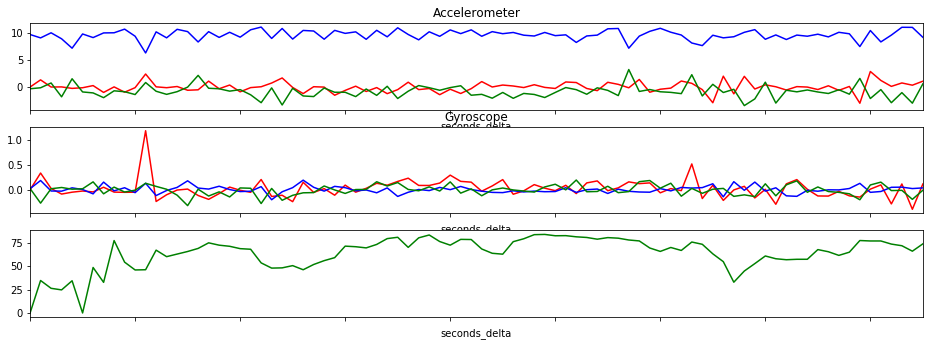

In [25]:
# Test sample
df_book2= (df
    .query("bookingID == '1056561954943'")
    .sort_values(by='seconds_delta'))
drawAccelGyroChart(df_book2)

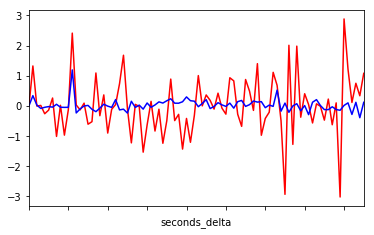

In [14]:
df_book2.set_index('seconds_delta')['acceleration_x'].plot(c='red')
df_book2.set_index('seconds_delta')['gyro_x'].plot(c='blue')

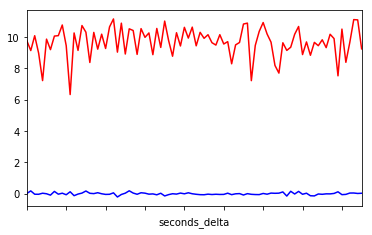

In [15]:
df_book2.set_index('seconds_delta')['acceleration_y'].plot(c='red')
df_book2.set_index('seconds_delta')['gyro_y'].plot(c='blue')

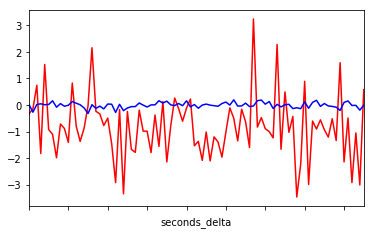

In [16]:
df_book2.set_index('seconds_delta')['acceleration_z'].plot(c='red')
df_book2.set_index('seconds_delta')['gyro_z'].plot(c='blue')

### Preprocessing for every booking
- Resample observation
- Filter using low pass or band filter
- Compute Singular acceleration vector
- Calculate vector magnitude
- Adjust for gravity
- Upsample and extract features

### Resample Sensor Data and Handle Signal Loss

The sensor data in the dataset was not evenly spaced and may experience signal loss.
Since we are looking at utilising a sliding time window with size of n data points and i increments, we need to resample such that there is a data point at every n and signal loss is being handled.

In [17]:
def resampleSensorData(df, period_col = 'seconds_delta', resample_rate = '1S'):
    return df.set_index(period_col).resample(resample_rate).mean().interpolate()

In [18]:
df_book2 = resampleSensorData(df_book2)
df_book2

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,Speed_kmh,label
seconds_delta,,,,,,,,,,,,,
00:00:06,1056561954943.0000,3.0000,308.0000,-0.0091,9.7703,-0.3317,-0.0014,0.0216,0.0239,6.0000,0.0000,0.0000,1.0000
00:00:07,1056561954943.0000,3.0030,308.0562,-0.0060,9.7688,-0.3312,-0.0006,0.0219,0.0232,7.0000,0.0226,0.0815,1.0000
00:00:08,1056561954943.0000,3.0061,308.1124,-0.0029,9.7674,-0.3308,0.0002,0.0223,0.0225,8.0000,0.0453,0.1631,1.0000
00:00:09,1056561954943.0000,3.0091,308.1686,0.0002,9.7659,-0.3304,0.0010,0.0227,0.0218,9.0000,0.0679,0.2446,1.0000
00:00:10,1056561954943.0000,3.0122,308.2248,0.0034,9.7644,-0.3299,0.0018,0.0231,0.0211,10.0000,0.0906,0.3261,1.0000
00:00:11,1056561954943.0000,3.0152,308.2810,0.0065,9.7629,-0.3295,0.0025,0.0235,0.0204,11.0000,0.1132,0.4077,1.0000
00:00:12,1056561954943.0000,3.0183,308.3372,0.0096,9.7614,-0.3291,0.0033,0.0239,0.0197,12.0000,0.1359,0.4892,1.0000
00:00:13,1056561954943.0000,3.0213,308.3934,0.0127,9.7600,-0.3286,0.0041,0.0243,0.0190,13.0000,0.1585,0.5708,1.0000
00:00:14,1056561954943.0000,3.0244,308.4496,0.0158,9.7585,-0.3282,0.0049,0.0246,0.0183,14.0000,0.1812,0.6523,1.0000


### Filtering

To handle potential noise in the sensor, we utilise a low pass filter on sensors.
Since we assume that most orientation is upright, the z-axis denotes forward/backward acceleration while the x-axis denotes left/right movement. The y-axis, denoting up/down movement may need a smaller cutoff rate to account for more noises due to small bumps on the road.

In [19]:
from scipy.signal import butter, lfilter, freqz
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 3
fs = 60    # sample rate, Hz
cutoff = 0.8 # desired cutoff frequency of the filter, Hz

In [49]:
# Convience function to filter sensor data
def lowpassFilterAccelGyro(df):
    order = 3
    fs = 60   # sample rate, Hz
    accel_cutoff = 2 # desired cutoff frequency of the filter, Hz
    gyro_cutoff = 0.5
    
    df['acceleration_x_fltr'] = butter_lowpass_filter(df['acceleration_x'], accel_cutoff, fs, order)
    df['acceleration_y_fltr'] = butter_lowpass_filter(df['acceleration_y'], accel_cutoff, fs, order)
    df['acceleration_z_fltr'] = butter_lowpass_filter(df['acceleration_z'], accel_cutoff, fs, order)
    
    df['gyro_x_fltr'] = butter_lowpass_filter(df['gyro_x'], gyro_cutoff, fs, order)
    df['gyro_y_fltr'] = butter_lowpass_filter(df['gyro_y'], gyro_cutoff, fs, order)
    df['gyro_z_fltr'] = butter_lowpass_filter(df['gyro_z'], gyro_cutoff, fs, order)

In [30]:
# Build filtered columns
lowpassFilterAccelGyro(df_book2)
df_book2

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,Speed_kmh,label,seconds_delta,acceleration_x_fltr,acceleration_y_fltr,acceleration_z_fltr,gyro_x_fltr,gyro_y_fltr,gyro_z_fltr
583,1056561954943,3.0000,308.0000,-0.0091,9.7703,-0.3317,-0.0014,0.0216,0.0239,6.0000,0.0000,0.0000,1,00:00:06,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
624,1056561954943,4.3000,332.0000,1.3227,9.1398,-0.1483,0.3370,0.1864,-0.2705,433.0000,9.6712,34.8165,1,00:07:13,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000
592,1056561954943,4.7000,336.0000,-0.0080,10.0880,0.7444,0.0270,-0.0254,0.0203,455.0000,7.3454,26.4435,1,00:07:35,0.0000,0.0001,-0.0000,0.0000,0.0000,-0.0000
561,1056561954943,4.7000,340.0000,0.0124,8.9723,-1.8306,-0.0876,-0.0286,0.0453,469.0000,6.8754,24.7513,1,00:07:49,0.0000,0.0002,-0.0000,0.0000,0.0000,-0.0000
626,1056561954943,3.9000,335.0000,-0.2634,7.2237,1.5291,-0.0496,0.0383,0.0109,473.0000,9.5942,34.5392,1,00:07:53,0.0000,0.0005,-0.0000,0.0000,0.0000,-0.0000
553,1056561954943,3.0000,320.0000,-0.1429,9.8693,-0.9253,-0.0261,0.0045,0.0193,496.0000,0.0000,0.0000,1,00:08:16,0.0000,0.0011,-0.0000,0.0000,0.0000,-0.0000
607,1056561954943,3.9000,64.0000,0.2582,9.1993,-1.1069,-0.0440,-0.0831,0.1588,525.0000,13.5517,48.7861,1,00:08:45,0.0001,0.0020,-0.0000,0.0000,0.0000,-0.0000
570,1056561954943,3.9000,356.0000,-1.0161,10.0643,-1.9897,0.0505,0.1542,-0.0823,545.0000,9.1256,32.8521,1,00:09:05,0.0001,0.0034,-0.0001,0.0000,0.0000,-0.0000
590,1056561954943,3.9000,314.0000,0.0167,10.0925,-0.7159,-0.0479,-0.0227,0.0531,571.0000,21.5708,77.6548,1,00:09:31,0.0002,0.0054,-0.0001,0.0000,0.0000,-0.0000
591,1056561954943,3.9000,310.0000,-0.9738,10.7715,-0.8846,-0.0521,0.0403,-0.0464,581.0000,15.1386,54.4990,1,00:09:41,0.0003,0.0082,-0.0002,0.0000,0.0000,-0.0000


### Get acceleration magnitude from tri-axis accelerameter data



### Pipeline to process and build features
- Resample observation
- Filter using low pass or band filter
- Compute Singular acceleration vector
- (todo)Calculate vector magnitude
- (todo)Adjust for gravity
- (todo)Upsample and extract features OR
- Sliding window and extract features within the sliding window

In [26]:
def buildDrivingFeatures(df):
    # Returns df contain features
    df_temp = resampleSensorData(df)
    lowpassFilterAccelGyro(df_temp)
    
    df_temp['accel_magnitude'] = np.sqrt(df_temp['acceleration_x']**2+df_temp['acceleration_y']**2
                                         +df_temp['acceleration_z']**2)
    df_temp['accel_magnitude_fltr'] = np.sqrt(df_temp['acceleration_x_fltr']**2+df_temp['acceleration_y_fltr']**2
                                         +df_temp['acceleration_z_fltr']**2)
    return df_temp

In [ ]:
def extractFeaturesFromSlidingWindow(df, sliding_window=5, increment=2):
    # Within the sliding window, calculate a series of features
    # Include two new columns, start_window and end_window
    # Features includes 
    #  - basic statistics of the acceleration magnitude
    #  - time signal related features
    #  - FFT features

In [47]:
# Test sample
df_book2= (df
    .query("bookingID == '1056561954943'")
    .sort_values(by='seconds_delta'))
temp = buildDrivingFeatures(df_book2)
temp

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,...,Speed_kmh,label,acceleration_x_fltr,acceleration_y_fltr,acceleration_z_fltr,gyro_x_fltr,gyro_y_fltr,gyro_z_fltr,accel_magnitude,accel_magnitude_fltr
seconds_delta,,,,,,,,,,,,,,,,,,,,,
00:00:06,1056561954943.0000,3.0000,308.0000,-0.0091,9.7703,-0.3317,-0.0014,0.0216,0.0239,6.0000,...,0.0000,1.0000,-0.0000,0.0009,-0.0000,-0.0000,0.0000,0.0000,9.7759,0.0009
00:00:07,1056561954943.0000,3.0030,308.0562,-0.0060,9.7688,-0.3312,-0.0006,0.0219,0.0232,7.0000,...,0.0815,1.0000,-0.0000,0.0077,-0.0003,-0.0000,0.0000,0.0000,9.7744,0.0077
00:00:08,1056561954943.0000,3.0061,308.1124,-0.0029,9.7674,-0.3308,0.0002,0.0223,0.0225,8.0000,...,0.1631,1.0000,-0.0000,0.0323,-0.0011,-0.0000,0.0000,0.0000,9.7730,0.0324
00:00:09,1056561954943.0000,3.0091,308.1686,0.0002,9.7659,-0.3304,0.0010,0.0227,0.0218,9.0000,...,0.2446,1.0000,-0.0001,0.0932,-0.0032,-0.0000,0.0000,0.0000,9.7715,0.0932
00:00:10,1056561954943.0000,3.0122,308.2248,0.0034,9.7644,-0.3299,0.0018,0.0231,0.0211,10.0000,...,0.3261,1.0000,-0.0002,0.2101,-0.0071,-0.0000,0.0000,0.0000,9.7700,0.2102
00:00:11,1056561954943.0000,3.0152,308.2810,0.0065,9.7629,-0.3295,0.0025,0.0235,0.0204,11.0000,...,0.4077,1.0000,-0.0003,0.4010,-0.0136,-0.0000,0.0001,0.0001,9.7685,0.4012
00:00:12,1056561954943.0000,3.0183,308.3372,0.0096,9.7614,-0.3291,0.0033,0.0239,0.0197,12.0000,...,0.4892,1.0000,-0.0004,0.6789,-0.0230,-0.0000,0.0001,0.0002,9.7670,0.6793
00:00:13,1056561954943.0000,3.0213,308.3934,0.0127,9.7600,-0.3286,0.0041,0.0243,0.0190,13.0000,...,0.5708,1.0000,-0.0005,1.0509,-0.0356,-0.0000,0.0002,0.0002,9.7655,1.0515
00:00:14,1056561954943.0000,3.0244,308.4496,0.0158,9.7585,-0.3282,0.0049,0.0246,0.0183,14.0000,...,0.6523,1.0000,-0.0006,1.5177,-0.0514,-0.0000,0.0004,0.0004,9.7640,1.5186


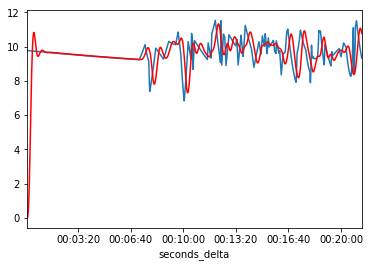

In [50]:
temp['accel_magnitude'].plot()
temp['accel_magnitude_fltr'].plot(c='red')

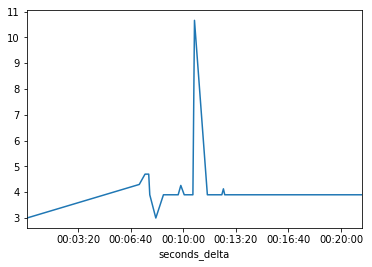

In [37]:
temp['Bearing'].plot()
temp['Accuracy'].plot()

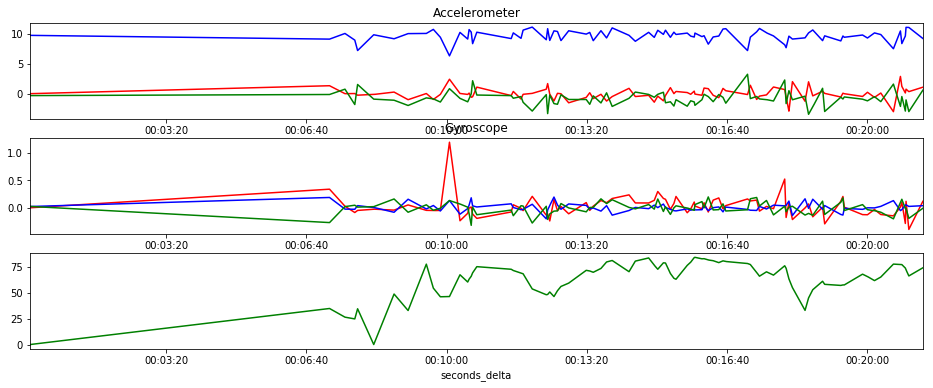

In [41]:
drawAccelGyroChart(temp)

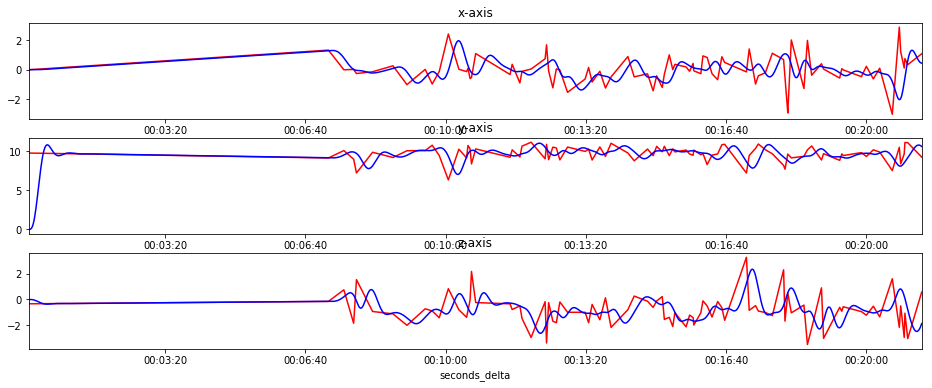

In [51]:
drawAccelFilterChart(temp)

In [311]:
df_book1= (df
    .query("bookingID == '1202590843006'")
    .sort_values(by='seconds_delta'))

df_book1

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,Speed_kmh,label,seconds_delta
84,1202590843006,6.1810,316.0000,1.3147,9.5030,3.7511,0.0149,-0.0023,-0.0317,25.0000,7.9988,28.7957,1,00:00:25
79,1202590843006,10.3680,326.0000,5.0354,7.9671,5.2730,-0.0247,-0.4853,-0.2051,29.0000,5.1328,18.4779,1,00:00:29
31,1202590843006,10.3970,51.0000,4.9702,8.3408,4.8616,-0.1718,-0.8928,-0.3700,31.0000,2.4323,8.7562,1,00:00:31
53,1202590843006,14.7420,130.0000,1.7143,8.8398,3.2737,-0.0341,-0.0446,0.0739,43.0000,14.5131,52.2471,1,00:00:43
95,1202590843006,17.8250,134.0000,2.2291,8.3128,5.5607,-0.1777,0.0279,0.0374,45.0000,14.1713,51.0166,1,00:00:45
7,1202590843006,16.0270,135.0000,1.6185,7.7068,6.3373,-0.0101,-0.0694,0.0142,46.0000,12.4964,44.9871,1,00:00:46
43,1202590843006,8.6020,35.0000,1.5050,8.8604,4.2590,0.0178,0.0992,0.0328,57.0000,2.1379,7.6963,1,00:00:57
30,1202590843006,7.9930,31.0000,1.7420,8.8948,3.8663,0.0024,0.0520,0.0294,59.0000,1.1354,4.0873,1,00:00:59
17,1202590843006,7.5650,42.0000,1.5830,8.8756,3.9962,-0.0062,-0.0328,-0.0242,60.0000,0.6727,2.4217,1,00:01:00
18,1202590843006,4.8280,42.0000,1.6355,9.0045,4.0722,0.0090,-0.0156,-0.0224,61.0000,0.0000,0.0000,1,00:01:01


In [76]:
pd.to_timedelta(df_book1['seconds_delta'],unit='s') 

84    00:00:25
79    00:00:29
31    00:00:31
53    00:00:43
95    00:00:45
7     00:00:46
43    00:00:57
30    00:00:59
17    00:01:00
18    00:01:01
112   00:01:17
113   00:01:25
14    00:01:47
89    00:01:51
35    00:02:23
2     00:02:34
25    00:02:39
1     00:09:01
8     00:09:04
76    00:09:18
91    00:09:27
96    00:09:35
69    00:09:38
9     00:09:39
37    00:09:45
70    00:09:47
19    00:09:49
118   00:09:56
29    00:10:02
12    00:10:03
        ...   
27    00:19:26
72    00:20:16
77    00:20:22
87    00:20:27
26    00:20:35
108   00:20:58
39    00:21:09
85    00:21:23
57    00:21:36
90    00:21:41
47    00:21:44
20    00:22:15
97    00:22:20
60    00:22:23
93    00:22:32
0     00:22:42
3     00:23:04
115   00:23:26
45    00:23:32
109   00:23:34
104   00:23:39
71    00:23:48
56    00:23:49
23    00:24:03
68    00:24:06
48    00:24:13
11    00:24:25
15    00:24:40
16    00:24:41
46    00:25:12
Name: second, Length: 119, dtype: timedelta64[ns]

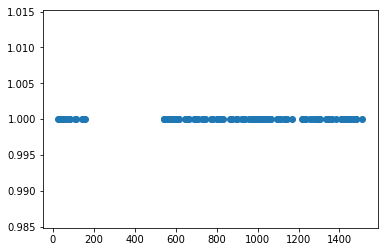

In [71]:
plt.scatter(y=np.ones(len(df_book1)), x=df_book1['second'])

In [100]:
df_book1['seconds_delta']/ np.timedelta64(1, 's')

84      25.0000
79      29.0000
31      31.0000
53      43.0000
95      45.0000
7       46.0000
43      57.0000
30      59.0000
17      60.0000
18      61.0000
112     77.0000
113     85.0000
14     107.0000
89     111.0000
35     143.0000
2      154.0000
25     159.0000
1      541.0000
8      544.0000
76     558.0000
91     567.0000
96     575.0000
69     578.0000
9      579.0000
37     585.0000
70     587.0000
19     589.0000
118    596.0000
29     602.0000
12     603.0000
         ...   
27    1166.0000
72    1216.0000
77    1222.0000
87    1227.0000
26    1235.0000
108   1258.0000
39    1269.0000
85    1283.0000
57    1296.0000
90    1301.0000
47    1304.0000
20    1335.0000
97    1340.0000
60    1343.0000
93    1352.0000
0     1362.0000
3     1384.0000
115   1406.0000
45    1412.0000
109   1414.0000
104   1419.0000
71    1428.0000
56    1429.0000
23    1443.0000
68    1446.0000
48    1453.0000
11    1465.0000
15    1480.0000
16    1481.0000
46    1512.0000
Name: seconds_delta, Len

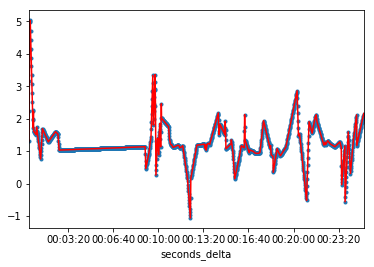

In [116]:
df_test = df_book1.set_index('seconds_delta').resample('1S').mean().interpolate()
# df_test = df_test.resample('10S').ffill()
df_test['acceleration_x'].plot(style='.')
df_test['acceleration_x'].plot(c='red')

In [117]:
def resampleSensorData(df, period_col = 'seconds_delta', resample_rate = '1S'):
    return df.set_index(period_col).resample(resample_rate).mean().interpolate()

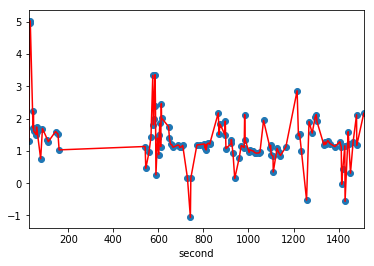

In [102]:
plt.scatter(y=df_book1['acceleration_x'], x=df_book1['seconds_delta']/ np.timedelta64(1, 's'))
df_book1.set_index('second')['acceleration_x'].plot(c='red')

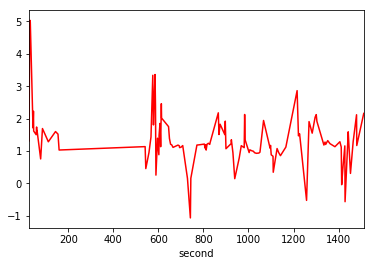

In [73]:
df_book1.set_index('second')['acceleration_x'].plot(c='red')

In [24]:
(df.query("Accuracy>20").sort_values(by='second', ascending=False))

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
638678,858993459333,21.636,0.000000,0.229843,9.911995,1.570596,-0.008858,-0.033598,0.011301,619315821.0,-1.000000
737191,858993459333,24.706,0.000000,0.689530,10.400413,1.446098,0.028711,-0.088270,-0.007636,619315786.0,-1.000000
267319,858993459333,25.836,0.000000,1.005565,9.241618,0.411803,-0.176540,-0.076358,-0.007330,619315692.0,-1.000000
898132,858993459333,31.185,0.000000,0.172383,9.672575,1.187524,-0.060781,0.015272,0.020464,619315608.0,-1.000000
856931,858993459333,28.341,0.000000,-0.009577,9.777920,1.302446,-0.056505,0.029322,0.036652,619315577.0,-1.000000
88251,858993459333,33.727,0.000000,-0.507571,9.758766,1.350330,-0.055894,0.140804,0.113315,619315371.0,-1.000000
419232,1374389534819,24.000,23.111814,0.604126,-9.930545,-1.115839,0.029834,-0.153395,0.001361,4319.0,1.324794
309185,1374389534819,33.000,349.980743,0.286063,-9.775476,-0.297726,-0.011779,-0.334396,0.011888,4317.0,2.190173
1176623,34359738469,1414.000,37.946770,1.097296,-1.676898,-9.615024,0.003269,0.004108,-0.003224,4303.0,-1.000000
1245067,34359738469,1414.000,38.986145,1.145746,-1.662692,-9.620706,0.009989,0.005256,-0.005007,4298.0,-1.000000


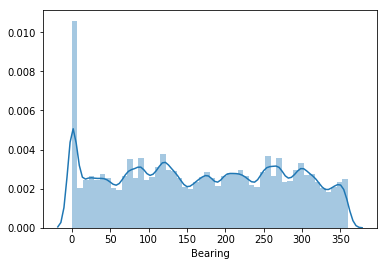

In [25]:
sns.distplot(df['Bearing'])

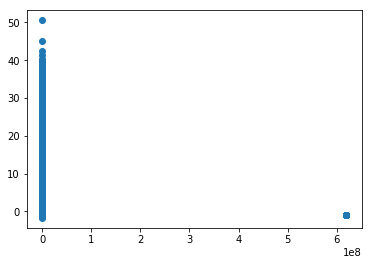

In [12]:
# The difference of observation windows
plt.scatter(x=df['second'], y=df['Speed'])

In [22]:
(df.query("second>5000").sort_values(by='second', ascending=False))

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
91569,1460288880770,5.994,0.0,-0.114922,9.270349,0.804452,-0.202807,-0.043982,-0.012217,619316528.0,-1.00
150076,1460288880770,5.297,0.0,0.651223,9.385271,1.455675,0.106291,-0.467923,-0.046426,619316508.0,-1.00
559691,858993459333,19.012,0.0,0.814029,8.523358,3.667917,-0.030238,0.101709,0.044288,619315826.0,-1.00
638678,858993459333,21.636,0.0,0.229843,9.911995,1.570596,-0.008858,-0.033598,0.011301,619315821.0,-1.00
737191,858993459333,24.706,0.0,0.689530,10.400413,1.446098,0.028711,-0.088270,-0.007636,619315786.0,-1.00
267319,858993459333,25.836,0.0,1.005565,9.241618,0.411803,-0.176540,-0.076358,-0.007330,619315692.0,-1.00
898132,858993459333,31.185,0.0,0.172383,9.672575,1.187524,-0.060781,0.015272,0.020464,619315608.0,-1.00
856931,858993459333,28.341,0.0,-0.009577,9.777920,1.302446,-0.056505,0.029322,0.036652,619315577.0,-1.00
233462,858993459333,16.491,0.0,0.488417,9.806650,-0.402226,-0.039706,0.034514,0.038790,619315480.0,-1.00
1329755,1460288880770,4.657,0.0,0.497994,9.653421,0.497994,0.000000,0.000000,0.000000,619315442.0,-1.00


In [20]:
df_book1= (df
    .query("bookingID == '1202590843006'")
#     .query("bookingID == '1460288880770'")
    .sort_values(by='second'))

df_book2 = (df
    .query("bookingID == '274877907034'")
    .sort_values(by='second'))
df_bookSafe = (df
    .query("bookingID == '111669149733'")
    .sort_values(by='second'))

In [21]:
df_book1

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
1485930,1460288880770,5.000,327.0,-0.076614,9.615114,0.191536,-0.045204,0.079412,-0.063530,2.0,13.974704
1088909,1460288880770,5.000,327.0,0.842759,9.615114,0.344765,0.105069,-0.034208,-0.012217,3.0,14.223238
1596345,1460288880770,5.000,279.0,1.149217,10.113108,1.187524,0.127060,-0.094073,0.073304,49.0,8.215716
87515,1460288880770,5.000,287.0,1.187524,9.806650,1.685518,0.120951,-0.059865,-0.075747,50.0,6.680718
290420,1460288880770,3.123,336.0,0.191536,9.500193,0.383072,0.000000,0.000000,0.000000,61.0,0.000000
847872,1460288880770,3.100,336.0,0.076614,9.461885,0.536301,0.000000,0.000000,0.000000,63.0,0.000000
1285696,1460288880770,3.088,336.0,0.114922,9.500193,0.612916,0.035430,-0.065973,0.021991,65.0,0.000000
336986,1460288880770,5.000,312.0,0.881066,9.270349,-0.842759,-0.036652,-0.204029,0.004887,77.0,4.475884
1302555,1460288880770,5.000,359.0,1.225831,9.500193,0.229843,0.191812,-0.065973,0.040317,83.0,8.128743
839393,1460288880770,5.000,19.0,-0.229843,10.036493,0.957681,-0.029322,0.023213,0.069639,88.0,9.969840


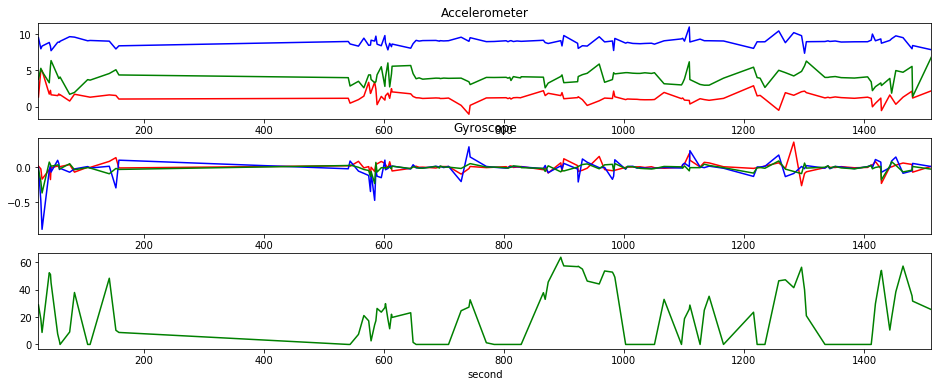

In [42]:
drawAccelGyroChart(df_book1)

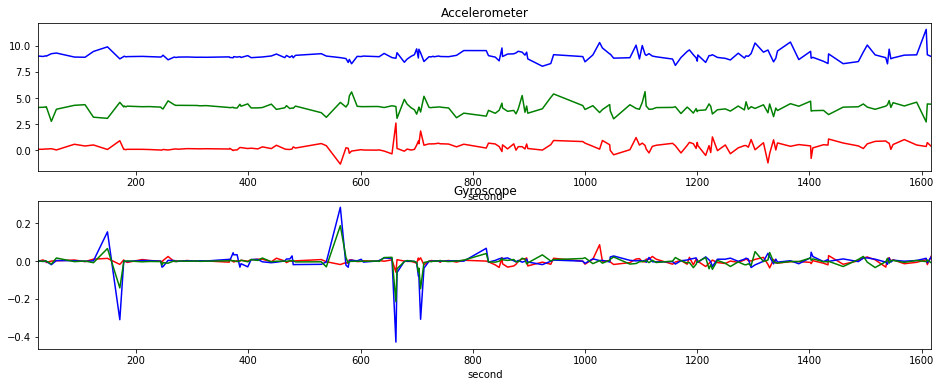

In [19]:
drawAccelGyroChart(df_book2)

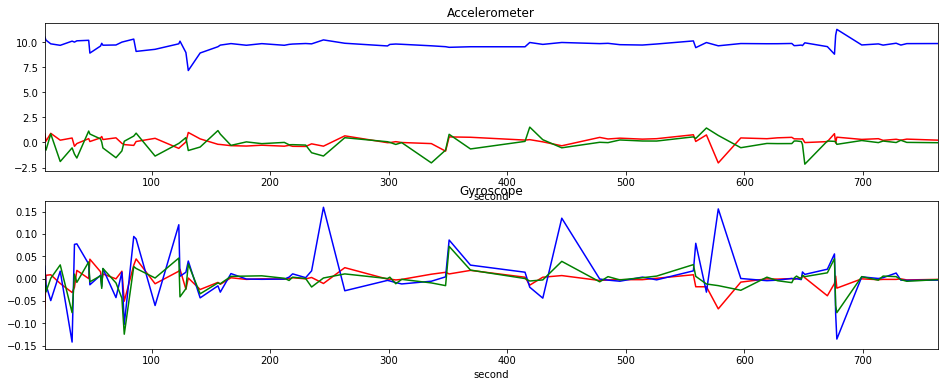

In [33]:
drawAccelGyroChart(df_bookSafe)

Text(0.5, 1.0, 'Gyroscope')

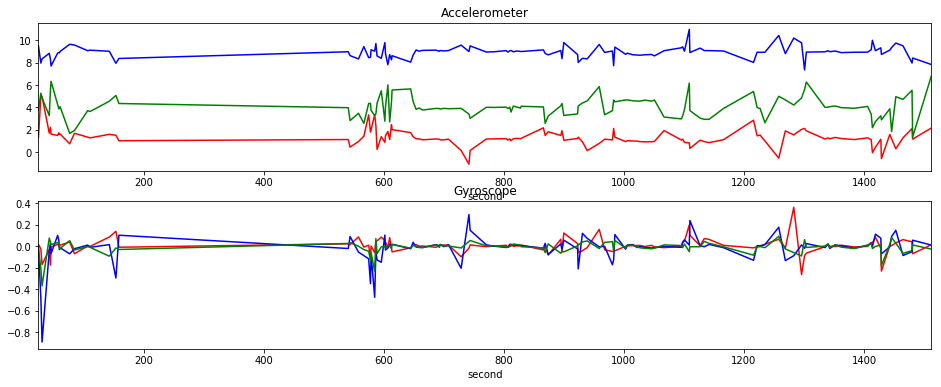

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(16,6))
# Accelerometer
df_book1.set_index('second')['acceleration_x'].plot(c='red', ax=ax1)
df_book1.set_index('second')['acceleration_y'].plot(c='blue', ax=ax1)
df_book1.set_index('second')['acceleration_z'].plot(c='green', ax=ax1)
# Gyroscope
df_book1.set_index('second')['gyro_x'].plot(c='red')
df_book1.set_index('second')['gyro_y'].plot(c='blue')
df_book1.set_index('second')['gyro_z'].plot(c='green')

ax1.set_title("Accelerometer")
ax2.set_title("Gyroscope")

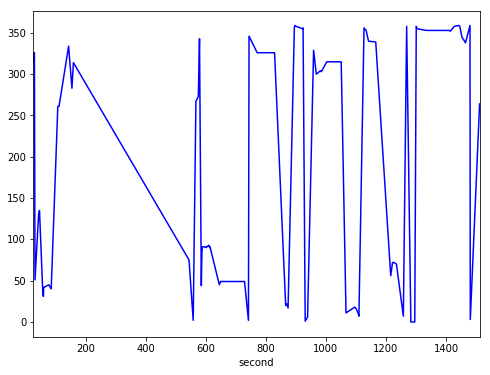

In [40]:
plt.figure(figsize=(8,6))
df_book1.set_index('second')['Bearing'].plot(c='blue')


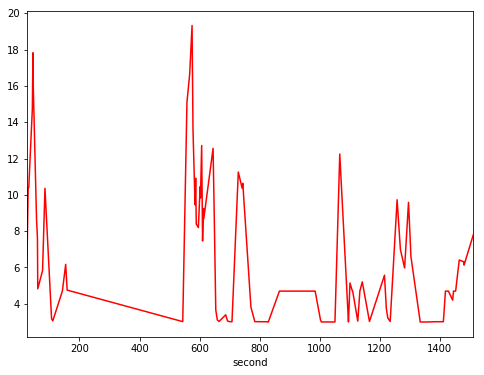

In [41]:
plt.figure(figsize=(8,6))
df_book1.set_index('second')['Accuracy'].plot(c='red')
